In [135]:
""" Build an Image Dataset in TensorFlow.
For this example, you need to make your own set of images (JPEG).
We will show 2 different ways to build that dataset:
- From a root folder, that will have a sub-folder containing images for each class
    ```
    ROOT_FOLDER
       |-------- SUBFOLDER (CLASS 0)
       |             |
       |             | ----- image1.jpg
       |             | ----- image2.jpg
       |             | ----- etc...
       |             
       |-------- SUBFOLDER (CLASS 1)
       |             |
       |             | ----- image1.jpg
       |             | ----- image2.jpg
       |             | ----- etc...
    ```
- From a plain text file, that will list all images with their class ID:
    ```
    /path/to/image/1.jpg CLASS_ID
    /path/to/image/2.jpg CLASS_ID
    /path/to/image/3.jpg CLASS_ID
    /path/to/image/4.jpg CLASS_ID
    etc...
    ```
Below, there are some parameters that you need to change (Marked 'CHANGE HERE'), 
such as the dataset path.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
"""
from __future__ import print_function

import tensorflow as tf
import os

# Dataset Parameters - CHANGE HERE
MODE = 'folder' # or 'file', if you choose a plain text file (see above).
DATASET_PATH = './images' # the dataset file or root folder path.

# Image Parameters
N_CLASSES = 1 # CHANGE HERE, total number of classes
IMG_HEIGHT = 96 # CHANGE HERE, the image height to be resized to
IMG_WIDTH = 96 # CHANGE HERE, the image width to be resized to
CHANNELS = 1 # The 3 color channels, change to 1 if grayscale


# Reading the dataset
# 2 modes: 'file' or 'folder'
def read_images(dataset_path, mode, batch_size):
    imagepaths, labels = list(), list()
    if mode == 'file':
        # Read dataset file
        with open(dataset_path) as f:
            data = f.read().splitlines()
        for d in data:
            imagepaths.append(d.split(' ')[0])
            labels.append(int(d.split(' ')[1]))
    elif mode == 'folder':
        # An ID will be affected to each sub-folders by alphabetical order
        label = 0
        # List the directory
        try:  # Python 2
            classes = sorted(os.walk(dataset_path).next()[1])
        except Exception:  # Python 3
            classes = sorted(os.walk(dataset_path).__next__()[1])
        # List each sub-directory (the classes)
        for c in classes:
            c_dir = os.path.join(dataset_path, c)
            try:  # Python 2
                walk = os.walk(c_dir).next()
            except Exception:  # Python 3
                walk = os.walk(c_dir).__next__()
            # Add each image to the training set
            for sample in walk[2]:
                # Only keeps jpeg images
                if sample.endswith('.jpg') or sample.endswith('.jpeg'):
                    imagepaths.append(os.path.join(c_dir, sample))
                    labels.append(label)
            label += 1
    else:
        raise Exception("Unknown mode.")
    
    # Convert to Tensor
    imagepaths = tf.convert_to_tensor(imagepaths, dtype=tf.string)
    labels = tf.convert_to_tensor(labels, dtype=tf.int32)
    # Build a TF Queue, shuffle data
    #image, label=tf.data.Dataset.from_tensor_slices((imagepaths, labels))#,
                                                  #shuffle=True)
    print('img',imagepaths)
    print('lab', labels)
    img_raw = tf.io.read_file(imagepaths)
    #dataset=tf.data.Dataset.from_tensor_slices((imagepaths, labels))#,
    print(dataset)
    #                                                   #shuffle=True)
    
#     print(dataset)
#     #image, label = tf.train.slice_input_producer([imagepaths, labels],
#     #                                         shuffle=True)

#     # Read images from disk
#     image = tf.io.read_file(dataset)
#     image = tf.image.decode_jpeg(image, channels=CHANNELS)

#     # Resize images to a common size
#     image = tf.image.resize_images(image, [IMG_HEIGHT, IMG_WIDTH])

#     # Normalize
#     image = image * 1.0/127.5 - 1.0

#     # Create batches
#     X, Y = tf.train.batch([image, label], batch_size=batch_size,
#                            capacity=batch_size * 8,
#                            num_threads=4)

    return 0,0#X, Y


In [136]:

# -----------------------------------------------
# THIS IS A CLASSIC CNN (see examples, section 3)
# -----------------------------------------------
# Note that a few elements have changed (usage of queues).

# Parameters
learning_rate = 0.001
num_steps = 10000
batch_size = 128
display_step = 100

# Network Parameters
dropout = 0.75 # Dropout, probability to keep units

# Build the data input
X, Y = read_images(DATASET_PATH, MODE, batch_size)



img tf.Tensor(
[b'./images\\simon\\simon_0.jpg' b'./images\\simon\\simon_1.jpg'
 b'./images\\simon\\simon_10.jpg' b'./images\\simon\\simon_11.jpg'
 b'./images\\simon\\simon_12.jpg' b'./images\\simon\\simon_13.jpg'
 b'./images\\simon\\simon_14.jpg' b'./images\\simon\\simon_15.jpg'
 b'./images\\simon\\simon_16.jpg' b'./images\\simon\\simon_17.jpg'
 b'./images\\simon\\simon_18.jpg' b'./images\\simon\\simon_19.jpg'
 b'./images\\simon\\simon_2.jpg' b'./images\\simon\\simon_20.jpg'
 b'./images\\simon\\simon_21.jpg' b'./images\\simon\\simon_22.jpg'
 b'./images\\simon\\simon_23.jpg' b'./images\\simon\\simon_24.jpg'
 b'./images\\simon\\simon_25.jpg' b'./images\\simon\\simon_26.jpg'
 b'./images\\simon\\simon_27.jpg' b'./images\\simon\\simon_28.jpg'
 b'./images\\simon\\simon_29.jpg' b'./images\\simon\\simon_3.jpg'
 b'./images\\simon\\simon_30.jpg' b'./images\\simon\\simon_31.jpg'
 b'./images\\simon\\simon_32.jpg' b'./images\\simon\\simon_33.jpg'
 b'./images\\simon\\simon_34.jpg' b'./images\\simon

InvalidArgumentError: Input filename tensor must be scalar, but had shape: [41] [Op:ReadFile]

In [137]:

# Create model
def conv_net(x, n_classes, dropout, reuse, is_training):
    # Define a scope for reusing the variables
    with tf.variable_scope('ConvNet', reuse=reuse):

        # Convolution Layer with 32 filters and a kernel size of 5
        conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)

        # Convolution Layer with 32 filters and a kernel size of 5
        conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)
        # Max Pooling (down-sampling) with strides of 2 and kernel size of 2
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)

        # Flatten the data to a 1-D vector for the fully connected layer
        fc1 = tf.contrib.layers.flatten(conv2)

        # Fully connected layer (in contrib folder for now)
        fc1 = tf.layers.dense(fc1, 1024)
        # Apply Dropout (if is_training is False, dropout is not applied)
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)

        # Output layer, class prediction
        out = tf.layers.dense(fc1, n_classes)
        # Because 'softmax_cross_entropy_with_logits' already apply softmax,
        # we only apply softmax to testing network
        out = tf.nn.softmax(out) if not is_training else out

    return out


# Because Dropout have different behavior at training and prediction time, we
# need to create 2 distinct computation graphs that share the same weights.

# Create a graph for training
logits_train = conv_net(X, N_CLASSES, dropout, reuse=False, is_training=True)
# Create another graph for testing that reuse the same weights
logits_test = conv_net(X, N_CLASSES, dropout, reuse=True, is_training=False)

# Define loss and optimizer (with train logits, for dropout to take effect)
loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
    logits=logits_train, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits_test, 1), tf.cast(Y, tf.int64))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Saver object
saver = tf.train.Saver()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Start the data queue
    tf.train.start_queue_runners()

    # Training cycle
    for step in range(1, num_steps+1):

        if step % display_step == 0:
            # Run optimization and calculate batch loss and accuracy
            _, loss, acc = sess.run([train_op, loss_op, accuracy])
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
        else:
            # Only run the optimization op (backprop)
            sess.run(train_op)

    print("Optimization Finished!")

    # Save your model
    saver.save(sess, 'my_tf_model')
    

AttributeError: module 'tensorflow' has no attribute 'variable_scope'

In [138]:
import pathlib
root_path = './images' 
data_root = pathlib.Path(root_path)
for item in data_root.iterdir():
    print(item)
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count
all_image_paths[:10]

images\simon


['images\\simon\\simon_2.jpg',
 'images\\simon\\simon_40.jpg',
 'images\\simon\\simon_14.jpg',
 'images\\simon\\simon_0.jpg',
 'images\\simon\\simon_15.jpg',
 'images\\simon\\simon_28.jpg',
 'images\\simon\\simon_10.jpg',
 'images\\simon\\simon_6.jpg',
 'images\\simon\\simon_38.jpg',
 'images\\simon\\simon_16.jpg']

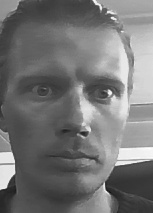

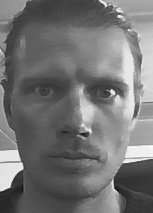

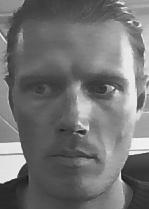

In [139]:
import IPython.display as display

#def caption_image(image_path):
#    image_rel = pathlib.Path(image_path).relative_to(data_root)
#    return "Image (CC BY 2.0) " + ' - '.join(attributions[str(image_rel)].split(' - ')[:-1])
for n in range(3):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    #print(caption_image(image_path))
    print()

In [140]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['simon']

In [141]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'simon': 0}

In [142]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [143]:
img_path = all_image_paths[0]
img_path

'images\\simon\\simon_2.jpg'

In [144]:
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=12038, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x...


In [145]:
img_tensor = tf.image.decode_image(img_raw)

print(img_tensor.shape)
print(img_tensor.dtype)

(201, 141, 1)
<dtype: 'uint8'>


In [173]:
img_final = tf.image.resize(img_tensor, [96, 96])
img_final = img_final/255.0
print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(96, 96, 1)
0.10857173
0.9956505


In [174]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [150, 100])
    image /= 255.0  # normalize to [0,1] range

    return image

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

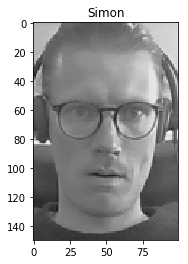

In [175]:
import matplotlib.pyplot as plt

img_path = all_image_paths[0]
label = all_image_labels[0]

plt.imshow(load_and_preprocess_image(img_path))
plt.grid(False)
#plt.xlabel(caption_image(img_path).encode('utf-8'))
plt.title(label_names[label].title())
print()

In [176]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [177]:
#print('shape: ', repr(path_ds.output_shapes))
print('type: ', path_ds.output_types)
print()
print(path_ds)

AttributeError: 'TensorSliceDataset' object has no attribute 'output_types'

In [178]:
image_ds = path_ds.map(load_and_preprocess_image)

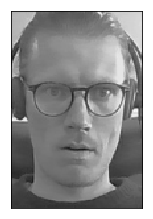

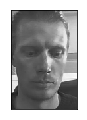

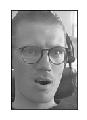

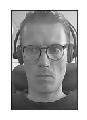

In [179]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n,image in enumerate(image_ds.take(4)):
    plt.subplot(2,2,n+1)
    plt.imshow(image)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    #plt.xlabel(caption_image(all_image_paths[n]))
    plt.show()

In [180]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))

In [154]:
for label in label_ds.take(10):
    print(label_names[label.numpy()])

simon
simon
simon
simon
simon
simon
simon
simon
simon
simon


In [155]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [156]:
print(image_label_ds)

<ZipDataset shapes: ((150, 100, 3), ()), types: (tf.float32, tf.int64)>


In [157]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# The tuples are unpacked into the positional arguments of the mapped function
def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_path_label)
image_label_ds

<MapDataset shapes: ((150, 100, 3), ()), types: (tf.float32, tf.int32)>

In [158]:
BATCH_SIZE = 32

# Setting a shuffle buffer size as large as the dataset ensures that the data is
# completely shuffled.
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# `prefetch` lets the dataset fetch batches, in the background while the model is training.
ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 150, 100, 3), (None,)), types: (tf.float32, tf.int32)>

In [159]:
ds = image_label_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
ds

<PrefetchDataset shapes: ((None, 150, 100, 3), (None,)), types: (tf.float32, tf.int32)>

In [160]:
mobile_net = tf.keras.applications.MobileNetV2(input_shape=(192, 192, 3), include_top=False)
mobile_net.trainable=False

In [161]:
help(keras_applications.mobilenet_v2.preprocess_input)

NameError: name 'keras_applications' is not defined

In [162]:
def change_range(image,label):
      return 2*image-1, label

keras_ds = ds.map(change_range)

In [163]:
# The dataset may take a few seconds to start, as it fills its shuffle buffer.
image_batch, label_batch = next(iter(keras_ds))

In [164]:
feature_map_batch = mobile_net(image_batch)
print(feature_map_batch.shape)

(32, 4, 3, 1280)


In [165]:
model = tf.keras.Sequential([
  mobile_net,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(len(label_names))])

In [166]:
logit_batch = model(image_batch).numpy()

print("min logit:", logit_batch.min())
print("max logit:", logit_batch.max())
print()

print("Shape:", logit_batch.shape)

min logit: -3.8547158
max logit: 0.62333757

Shape: (32, 1)


In [167]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=["accuracy"])

In [168]:
len(model.trainable_variables)

2

In [169]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_192 (Model) (None, 6, 6, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [171]:
import numpy as np
steps_per_epoch=np.ceil(len(all_image_paths)/BATCH_SIZE)

In [172]:
model.fit(ds, epochs=1, steps_per_epoch=3)

ValueError: Error when checking input: expected mobilenetv2_1.00_192_input to have shape (192, 192, 3) but got array with shape (150, 100, 3)